# Final Submission -MODEL DEPLOYMENT:
<hr/>

Submitted by <br>
Name: **stebin george** <br>
Register Number: **21122061** <br>
Class: **2MscDS** <br> 
Time_taken: **12 Hours** <br>
<hr/>

## Lab Overview  
### Objectives

TO get to know more about model comparison and deployment in ML.

### Problem Definition:

Choose a dataset and do model comaprison. Then finally come out with a deployment of the model

### Approach

• Find out a Dataset, and compare at least two different algorithms and choose the best one

• Use suitable Data Preprocessing and Feature Selection/Engineering Methods

• Fine tune the model and hyper parameters and Finalise the Model

• Make the model deployment-ready by giving User-Input provision

### Sections:

- Libraries used
- Loading dataset
- Data Preparations
    - Feature scaling
    - Data Cleaning
- Visualizations
- Data preprocessing& Feature selection
    - Label Encoders
- Modelling
    - Logistic Regression
    - K-nearest Neighbours
    -Decision tree
    - Bagging
    - BOOSTING
    - Neural_Networks
    - RANDOM-FOREST
- Evaluation Metrics(ROC,F1,Accuracy)
- Model Selection
- Deployment
    - Using Jupyter console
    - Using Tkinter
    - Using Flask(web page)
- Conclusion
- References

**Data Set**

**Fifa 19 is the most famous and played soccer game around the whole world with over 1.2 billion players. The game contains more than 70000 players in their databases.**

**The data set taken in this lab contains more than 18000 players with their different features from physical appearence, clubs, wages and their performance. The goal is to take those feature and predict the player position correctly.**

### Libraries Used:

In [4]:
# Define the libraries and imports
# Panda
import pandas as pd
#mat plot
import matplotlib.pyplot as plt
#Sea born
import seaborn as sns
#Num py
import numpy as np
#Sk learn imports
from sklearn import tree,preprocessing
#ensembles
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import sklearn.metrics as metrics
#scores
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,auc  
#models
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,learning_curve,GridSearchCV,validation_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
#export the model

### LOADING THE DATASET:

In [19]:
df=pd.read_csv(r"C:\Users\stebi\OneDrive\Desktop\players.csv")
df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### DATA PREPARATIONS:

In [20]:
def drop_columns(df):
    df.drop(df.loc[:, :'Name' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'Photo':'Special'],axis=1, inplace = True)
    df.drop(df.loc[:, 'International Reputation':'Real Face' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'Jersey Number':'Contract Valid Until' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'LS':'RB'],axis=1, inplace = True)
    df.drop(df.loc[:, 'GKDiving':'Release Clause'],axis=1, inplace = True)
    
def weight_to_int(df):
    df['Weight'] = df['Weight'].str[:-3]
    df['Weight'] = df['Weight'].apply(lambda x: int(x))
    return df
def impute_data(df):
    df.dropna(inplace=True)

**The results shows that there are null values in the given dataset and hence it should be removed.**

In [21]:
drop_columns(df)
impute_data(df)

### Feature Scaling:

**Since weight consist of lbs in the dataset,the data has to be cleaned so that the lbs is removed and the data is converted into integer value.**

In [22]:
weight_to_int(df)

,Age,Preferred Foot,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,31,Left,RF,5'7,159,84.0,95.0,70.0,90.0,86.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,33,Right,ST,6'2,183,84.0,94.0,89.0,81.0,87.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,26,Right,LW,5'9,150,79.0,87.0,62.0,84.0,84.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,27,Right,GK,6'4,168,17.0,13.0,21.0,50.0,13.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,27,Right,RCM,5'11,154,93.0,82.0,55.0,92.0,82.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,Right,CM,5'9,134,34.0,38.0,40.0,49.0,25.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,19,Right,ST,6'3,170,23.0,52.0,52.0,43.0,36.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,16,Right,ST,5'8,148,25.0,40.0,46.0,38.0,38.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,17,Right,RW,5'10,154,44.0,50.0,39.0,42.0,40.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


**Height consists of unwanted ' symbol which has to be removed and the value is scaled to cms from 'foot-inch' scale.**

In [23]:
def height_convert(df_height):
        try:
            feet = int(df_height[0])
            dlm = df_height[-2]
            if dlm == "'":
                height = round((feet * 12 + int(df_height[-1])) * 2.54, 0)
            elif dlm != "'":
                height = round((feet * 12 + int(df_height[-2:])) * 2.54, 0)
        except ValueError:
            height = 0
        return height
def height_to_int(df):
    df['Height'] = df['Height'].apply(height_convert)

height_to_int(df)

In [24]:
#Transform positions to 3 categories 'Striker', 'Midfielder', 'Defender' 
def transform_positions(df):
    for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
      df.loc[df.Position == i , 'Position'] = 'Striker' 
    
    for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
      df.loc[df.Position == i , 'Position'] = 'Midfielder' 
    
    for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB','GK']:
      df.loc[df.Position == i , 'Position'] = 'Defender' 
transform_positions(df)    


### Cleaned dataset:

In [25]:
df.head(5)

,Age,Preferred Foot,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,31,Left,Striker,170.0,159,84.0,95.0,70.0,90.0,86.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,33,Right,Striker,188.0,183,84.0,94.0,89.0,81.0,87.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,26,Right,Striker,175.0,150,79.0,87.0,62.0,84.0,84.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,27,Right,Defender,193.0,168,17.0,13.0,21.0,50.0,13.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,27,Right,Midfielder,180.0,154,93.0,82.0,55.0,92.0,82.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              18147 non-null  int64  
 1   Preferred Foot   18147 non-null  object 
 2   Position         18147 non-null  object 
 3   Height           18147 non-null  float64
 4   Weight           18147 non-null  int64  
 5   Crossing         18147 non-null  float64
 6   Finishing        18147 non-null  float64
 7   HeadingAccuracy  18147 non-null  float64
 8   ShortPassing     18147 non-null  float64
 9   Volleys          18147 non-null  float64
 10  Dribbling        18147 non-null  float64
 11  Curve            18147 non-null  float64
 12  FKAccuracy       18147 non-null  float64
 13  LongPassing      18147 non-null  float64
 14  BallControl      18147 non-null  float64
 15  Acceleration     18147 non-null  float64
 16  SprintSpeed      18147 non-null  float64
 17  Agility     

### Visualizations:

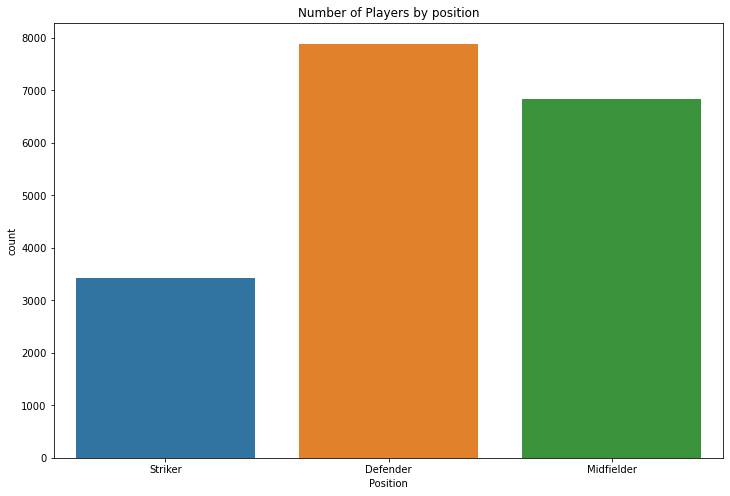

In [10]:
# Count number of players in each position using countplot
plt.figure(figsize=(12, 8))
plt.title("Number of Players by position")
fig = sns.countplot(x = 'Position', data =df)

**Most of the players are defenders and midfielders which makes sense, since that in every team we need less strikers.**

#### Physical appearences by position

Let's plot some physical appearences such as age, height and weight and see how it will affect the players positions.

In [11]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Position', ylabel='Weight'>

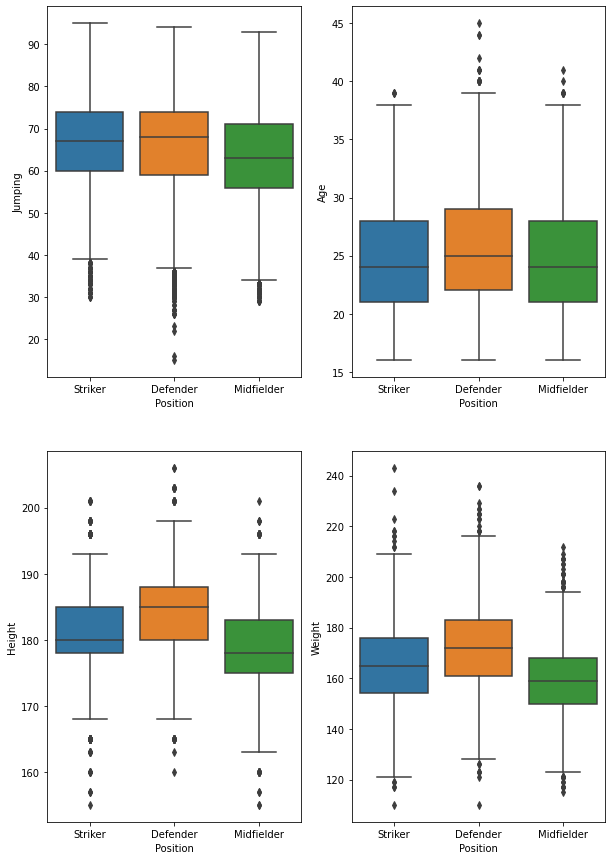

In [12]:
# Box plot skills by position
f, axes = plt.subplots(2, 2, figsize=(10, 15), sharex=False)
sns.boxplot('Position', 'Jumping', data = df, ax=axes[0, 0])
sns.boxplot('Position', 'Age', data = df, ax=axes[0, 1])
sns.boxplot('Position', 'Height', data = df, ax=axes[1, 0])
sns.boxplot('Position', 'Weight', data = df, ax=axes[1, 1])

#### Age vs sprinting speed:

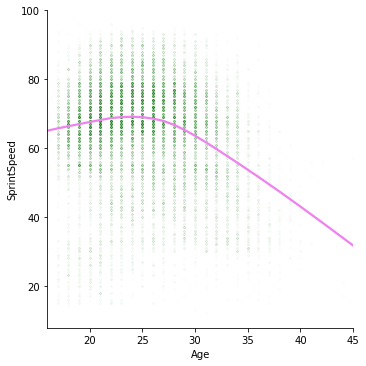

In [13]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'violet'})

**As the age increases the sprint speed decreases**

#### Bar plot Reaction by Age:

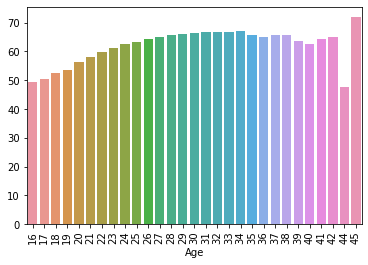

In [14]:
mean_value_per_age = df.groupby('Age')['Reactions'].mean()
p = sns.barplot(x = mean_value_per_age.index, y = mean_value_per_age.values)
p = plt.xticks(rotation=90)

#### Age vs FKAccuracy score:

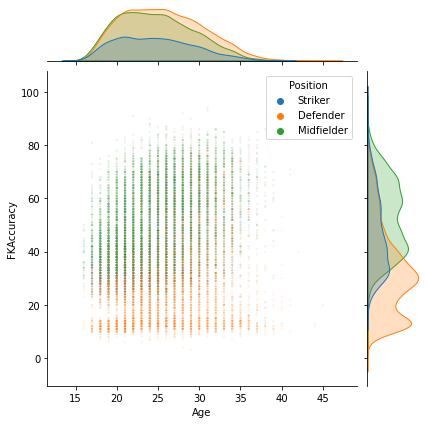

In [15]:
sns.jointplot(x=df['Age'],y=df['FKAccuracy'],
              joint_kws={'alpha':0.1,'s':5,'color':'m'},
              marginal_kws={'color':"m"},hue=df["Position"])

#### Scatter plot Finishing by shortPassing classified by position:

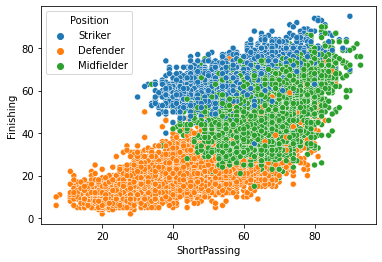

In [16]:
ax = sns.scatterplot(x="ShortPassing", y="Finishing", hue="Position",data=df)

### Data Preprocessing & Feature selection:

### Label Encoding:

In [26]:
encoder = preprocessing.LabelEncoder()
df['Preferred Foot']=encoder.fit_transform(df['Preferred Foot'].values)
encoder.classes_

array(['Left', 'Right'], dtype=object)

In [27]:
positions = df["Position"].unique()
encoder = preprocessing.LabelEncoder()
df['Position'] = encoder.fit_transform(df['Position'])
encoder.classes_

array(['Defender', 'Midfielder', 'Striker'], dtype=object)

### Features correlation:

In [354]:
# Drop some of unuseful coloumns
drop_elements = ['Position']
train=df.drop(drop_elements, axis = 1)

<AxesSubplot:title={'center':'Correlation of Features'}>

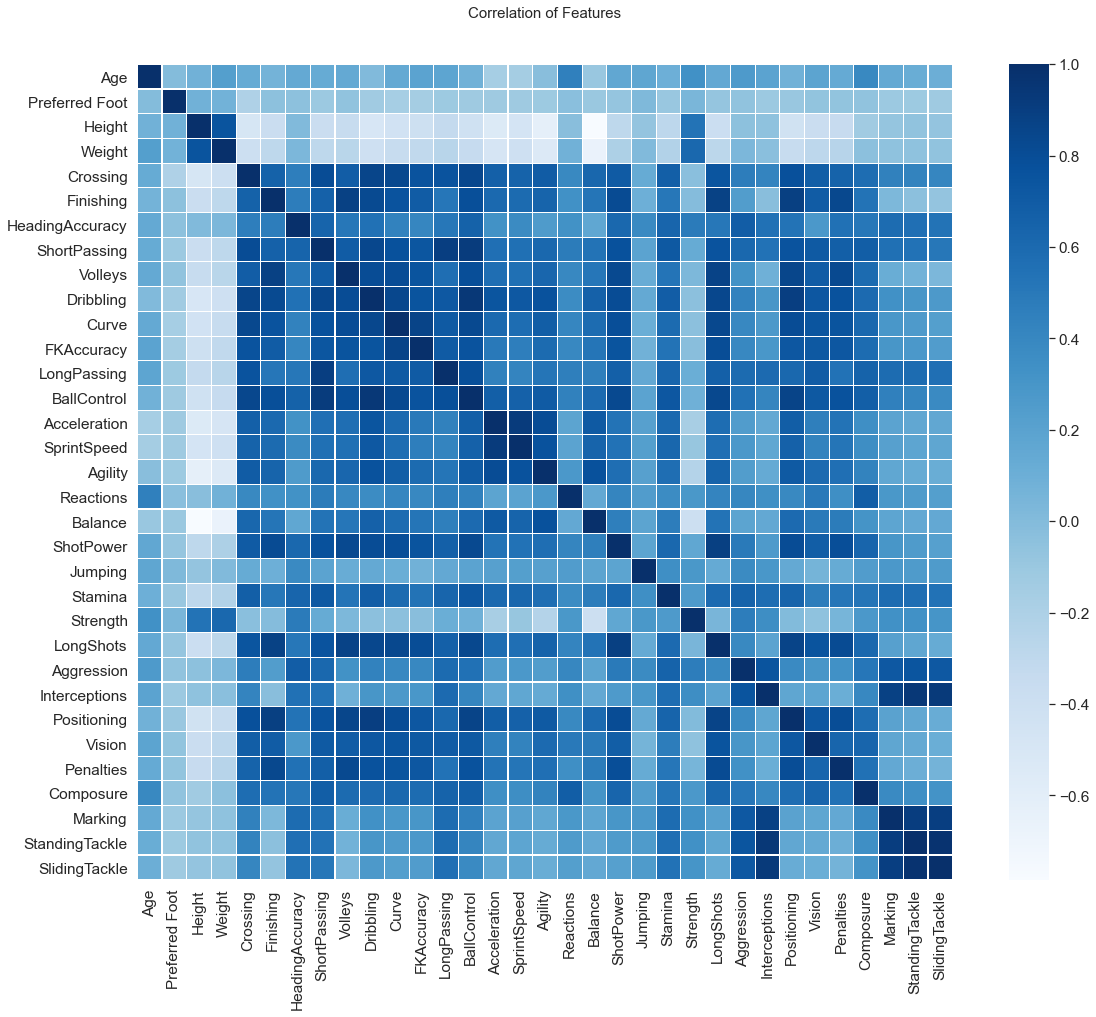

In [355]:
plt.figure(figsize=(20,15))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0
            ,cmap="Blues",square=True, linecolor='white', annot=False)

### Modelling:

#### Spllitting the data into training and testing:

In [28]:
#Target variable
Y=df['Position']
#The other features are all but the position
df.drop(columns=["Position"],inplace=True)
#Split the data
X_train, X_test, y_train, y_test = train_test_split(df,Y, test_size=0.20, 
                                                    random_state=42)

#### Plot Learning Curve:

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#### Plot Validation Curve:

In [30]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training Error')
    plt.plot(ticks, test_scores_mean, 'r-', label='Validation Error')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='accuracy'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=4, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=4))
                    
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=14)
    ax.text(3, -0.94, 'Underfitting', fontsize=14)
    plt.tight_layout()

### Model Creation and Hyper-Parameter Tuning:

In [31]:
def train_and_score(clf,X_train,y_train,X_test,y_test):
    clf = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    cf = confusion_matrix(y_test,preds)
    xm=accuracy_score(y_test, preds)
    yn=metrics.f1_score(y_test, preds,average='weighted')
    print(plot_confusion_matrix(cf, class_names=positions))
    return xm,yn
def plot_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 16})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("CONFUSION MATRIX")
    return fig

In [33]:
# to fetch the accuracy and f1 score for different 
acc_list=[]
f1_list=[]
algo=[]

### 1) Logistic regressionCV: 

Figure(720x504)


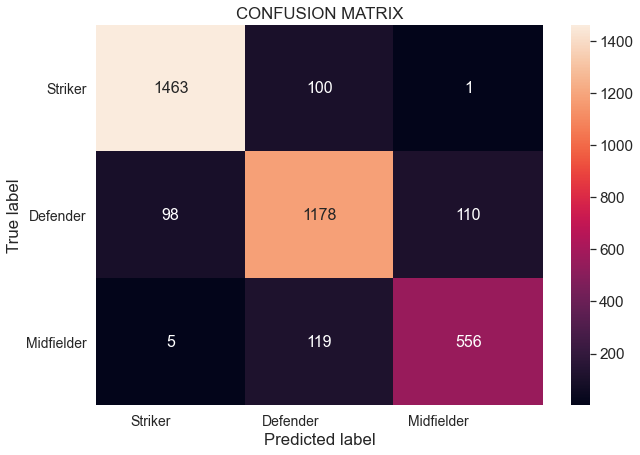

In [139]:
LR = LogisticRegressionCV(cv=5,random_state=20, solver='lbfgs',
                             multi_class='multinomial')
acc,f1=train_and_score(LR,X_train,y_train,X_test,y_test)
acc_list.append(round(acc,5))
f1_list.append(round(f1,5))
algo.append("LOGISTIC_REGRESSION_CV")

In [140]:
print(f"\033[1mThe accuracy of the model is :{acc}")
print(f"The F1 score of the model is : {f1} \033[0m")

The accuracy of the model is :0.8807162534435262
The F1 score of the model is : 0.8806542831272328 


<module 'matplotlib.pyplot' from 'C:\\Users\\stebi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

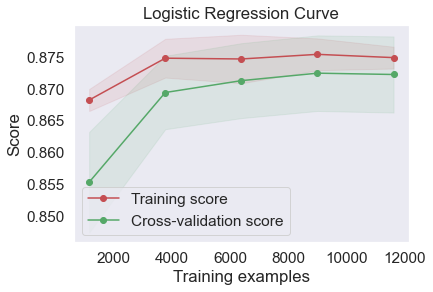

In [27]:
plot_learning_curve(LR, "Logistic Regression Curve", X_train, y_train)

**Logistic regression has a accuracy of 0.8807162534435262 and f1 score of 0.8806542831272328**

### 2) K-nearest Neighbours:

Figure(720x504)


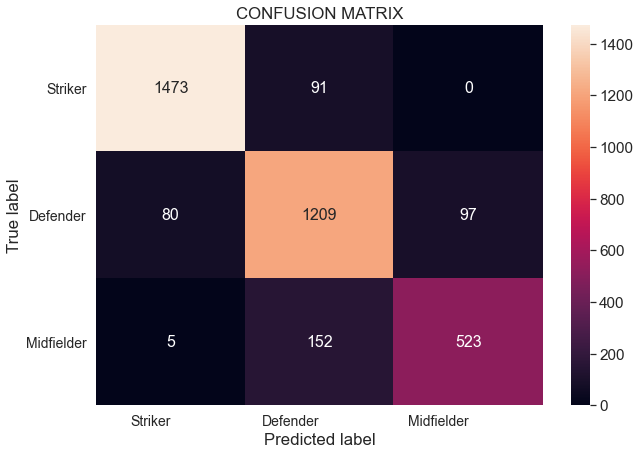

In [141]:
#create new a knn model
knn_model = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
KNN = GridSearchCV(knn_model, param_grid, cv=5)
acc,f1=train_and_score(KNN,X_train,y_train,X_test,y_test)
acc_list.append(round(acc,5))
f1_list.append(round(f1,5))
algo.append("K-NEAREST NEIGHBOURS")

In [143]:
print(f"\033[1mThe accuracy of the model is :{acc}")
print(f"The F1 score of the model is : {f1} \033[0m")

The accuracy of the model is :0.8829201101928374
The F1 score of the model is : 0.8826041487909726 


<module 'matplotlib.pyplot' from 'C:\\Users\\stebi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

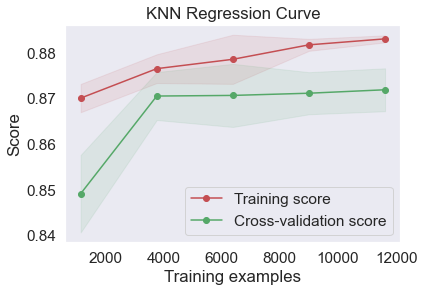

In [48]:
plot_learning_curve(KNN, "KNN Regression Curve", X_train, y_train)

**K-nearest Neighbours has a accuracy of 0.8829201101928374 and f1 score of 0.8826041487909726**

### 3) Decision Tree:

In [144]:
def min_impurity(X,y):
    tr_acc = []
    mln_set = range(75,90)                                 

    for minImp in mln_set:
        clf = tree.DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=minImp/100000)
        scores = cross_val_score(clf, X, y, cv=10)
        tr_acc.append(scores.mean())

    best_mln = mln_set[np.argmax(tr_acc)]
    return best_mln

best_min= min_impurity(X_train,y_train)

Figure(720x504)


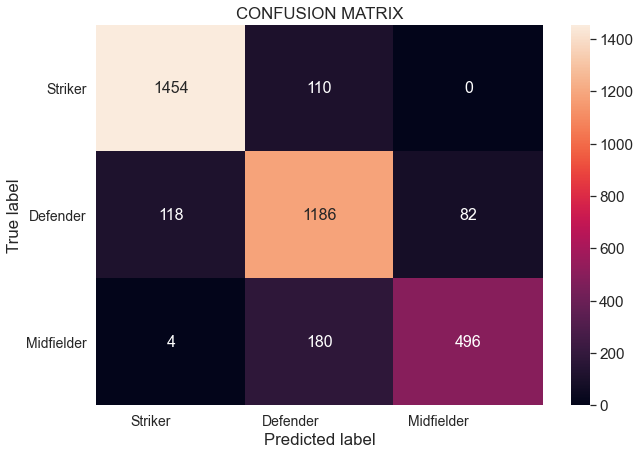

In [145]:
DT = tree.DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=best_min/100000)
acc,f1=train_and_score(DT,X_train,y_train,X_test,y_test)
acc_list.append(round(acc,5))
f1_list.append(round(f1,5))
algo.append("DECISION TREE")

In [146]:
print(f"\033[1mThe accuracy of the model is :{acc}")
print(f"The F1 score of the model is : {f1} \033[0m")

The accuracy of the model is :0.8639118457300275
The F1 score of the model is : 0.8631856558770937 


<module 'matplotlib.pyplot' from 'C:\\Users\\stebi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

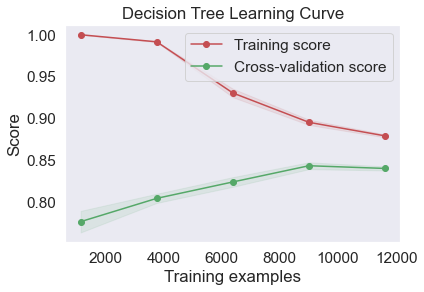

In [36]:
plot_learning_curve(DT, "Decision Tree Learning Curve", X_train, y_train)

**Decision tree has a accuracy of 0.8639118457300275 and f1 score of 0.8631856558770937**

### 4) Bagging:

**"Bagging" or bootstrap aggregation is a specific type of machine learning process that uses ensemble learning to evolve machine learning models.Bagging is used with decision trees, where it significantly raises the stability of models in improving accuracy and reducing variance, which eliminates the challenge of overfitting. Bagging in ensemble machine learning takes several weak models, aggregating the predictions to select the best prediction.**

Figure(720x504)


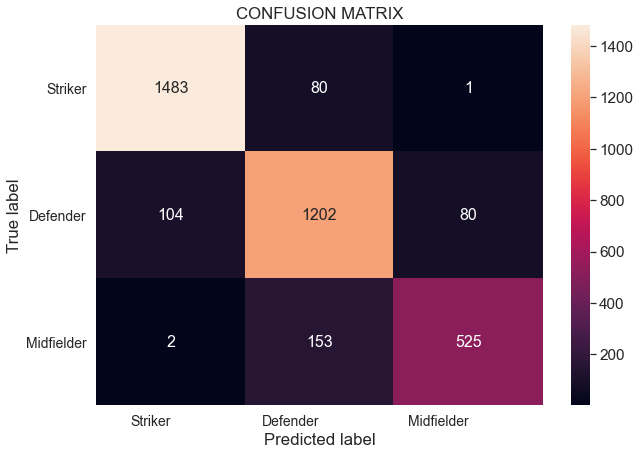

In [147]:
bagging = BaggingClassifier(tree.DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=best_min/100000))
acc,f1=train_and_score(bagging,X_train,y_train,X_test,y_test)
acc_list.append(round(acc,5))
f1_list.append(round(f1,5))
algo.append("BAGGING")

In [148]:
print(f"\033[1mThe accuracy of the model is :{acc}")
print(f"The F1 score of the model is : {f1} \033[0m")

The accuracy of the model is :0.8842975206611571
The F1 score of the model is : 0.8836288977604386 


<module 'matplotlib.pyplot' from 'C:\\Users\\stebi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

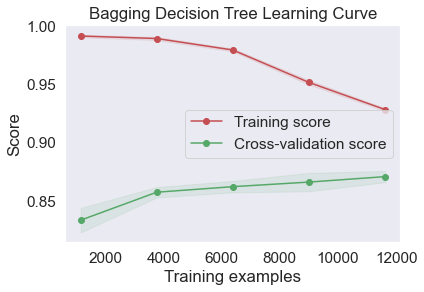

In [40]:
plot_learning_curve(bagging, "Bagging Decision Tree Learning Curve", X_train, y_train)

**Bagging decision tree has an accuracy of 0.8842975206611571 and f1 score of 0.8836288977604386**

### 5) Boosting:

**Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor.**

[12:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Figure(720x504)


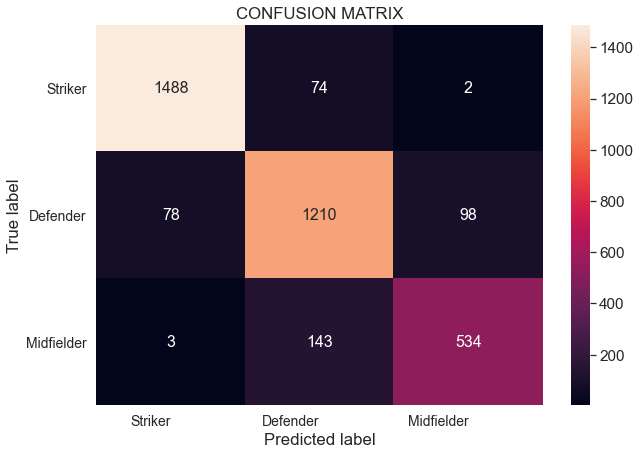

In [151]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 50  # the number of training iterations
boosting = xgb.train(param, dtrain, num_round)
boosting.dump_model('result.raw.txt')
preds = boosting.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
cf = confusion_matrix(y_test, best_preds)
print(plot_confusion_matrix(cf, class_names=positions))
acc=accuracy_score(y_test, best_preds)
f1=metrics.f1_score(y_test, best_preds,average='weighted')
acc_list.append(round(acc,5))
f1_list.append(round(f1,5))
algo.append("BOOSTING")

In [152]:
print(f"\033[1mThe accuracy of the model is :{acc}")
print(f"The F1 score of the model is : {f1} \033[0m")

The accuracy of the model is :0.8903581267217631
The F1 score of the model is : 0.8899954180125211 


**Boosting has an accuracy of 0.8903581267217631 and f1 score of 0.8899954180125211**

### 6) Random-forest: 

Figure(720x504)


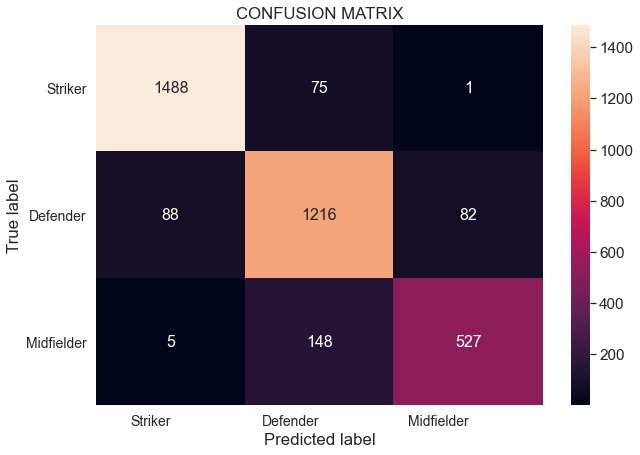

In [34]:
gridsearch_forest = RandomForestClassifier()
params = {
    "n_estimators": [1, 10, 100],
    "max_depth": [5,8,15],
    "min_samples_leaf" : [1, 2, 4]}
RF = GridSearchCV(gridsearch_forest, param_grid=params, cv=5 )
model=RF.fit(X_train,y_train)
acc,f1=train_and_score(RF,X_train,y_train,X_test,y_test)
acc_list.append(round(acc,5))
f1_list.append(round(f1,5))
algo.append("RANDOM-FOREST")

In [163]:
print(f"\033[1mThe accuracy of the model is :{acc}")
print(f"The F1 score of the model is : {f1} \033[0m")

The accuracy of the model is :0.8950413223140495
The F1 score of the model is : 0.8944281986363114 


<module 'matplotlib.pyplot' from 'C:\\Users\\stebi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

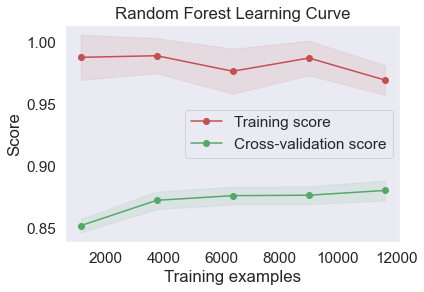

In [164]:
plot_learning_curve(RF, "Random Forest Learning Curve", X_train, y_train)

**Random-forest has an accuracy of 0.8950413223140495 and f1 score of 0.8944281986363114**

### 7) Neural Network:

Figure(720x504)
The accuracy of the model is :0.4308539944903581
The F1 score of the model is : 0.2594746428120602 


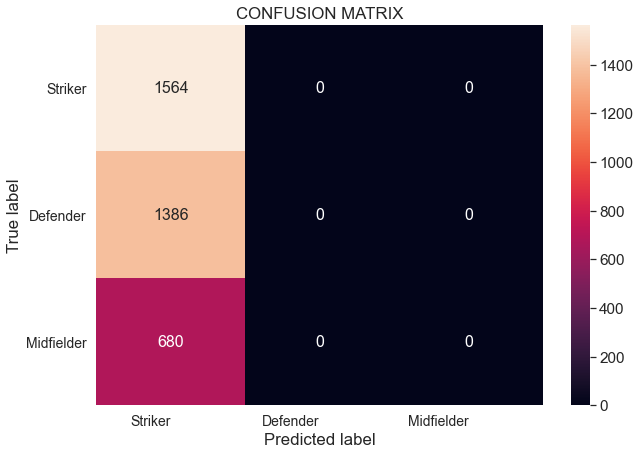

In [153]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
acc,f1=train_and_score(MLP,X_train,y_train,X_test,y_test)
print(f"\033[1mThe accuracy of the model is :{acc}")
print(f"The F1 score of the model is : {f1} \033[0m")

**Not a good model since the accuarcy is way behind the other algorithms. Hit and error method is used to increase the nuber of hidden layers to get the optimal number of hiddern layers**

Figure(720x504)
The accuracy of the model is :0.8862258953168044
The F1 score of the model is : 0.8859169324041941 


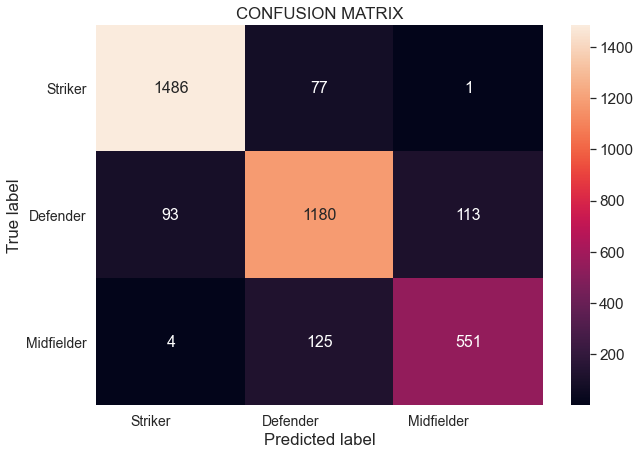

In [154]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(25, 20), random_state=42)
acc,f1=train_and_score(MLP,X_train,y_train,X_test,y_test)
print(f"\033[1mThe accuracy of the model is :{acc}")
print(f"The F1 score of the model is : {f1} \033[0m")

**The result shows that the value of the f1 score and the accuracy increases drastically when the number of hidden layers were increased considerably.**

Figure(720x504)


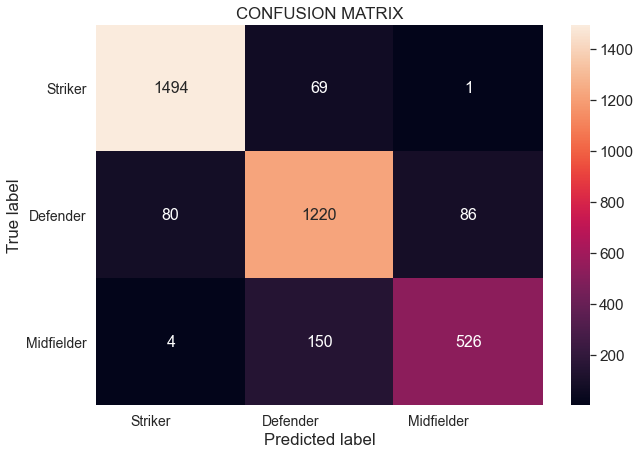

In [155]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(50, 20), random_state=42)
acc,f1=train_and_score(MLP,X_train,y_train,X_test,y_test)
acc_list.append(round(acc,5))
f1_list.append(round(f1,5))
algo.append("Neural_Networks")

In [156]:
print(f"\033[1mThe accuracy of the model is :{acc}")
print(f"The F1 score of the model is : {f1} \033[0m")

The accuracy of the model is :0.8925619834710744
The F1 score of the model is : 0.8919312925092538 


<module 'matplotlib.pyplot' from 'C:\\Users\\stebi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

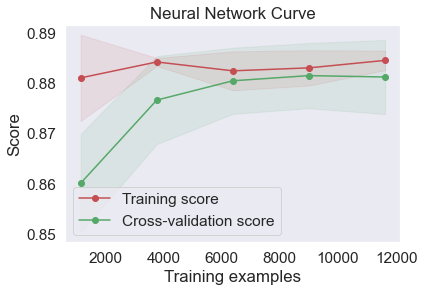

In [69]:
plot_learning_curve(MLP, "Neural Network Curve", X_train, y_train)

**Neural Networks has an accuracy of 0.8925619834710744 and f1 score of 0.8919312925092538**

### Evaluating the different models:

#### Drawing the ROC curve for the different algorithms to compare their performance with each other:

In [74]:
y1_test=y_test[(y_test ==0) | (y_test ==1)]
x1_test = X_test[X_test.index.isin(y1_test.index)]
print(y1_test)

4909     0
4789     1
15008    1
5136     1
6613     0
        ..
14972    0
2203     1
4484     1
11852    0
3578     1
Name: Position, Length: 2950, dtype: int32


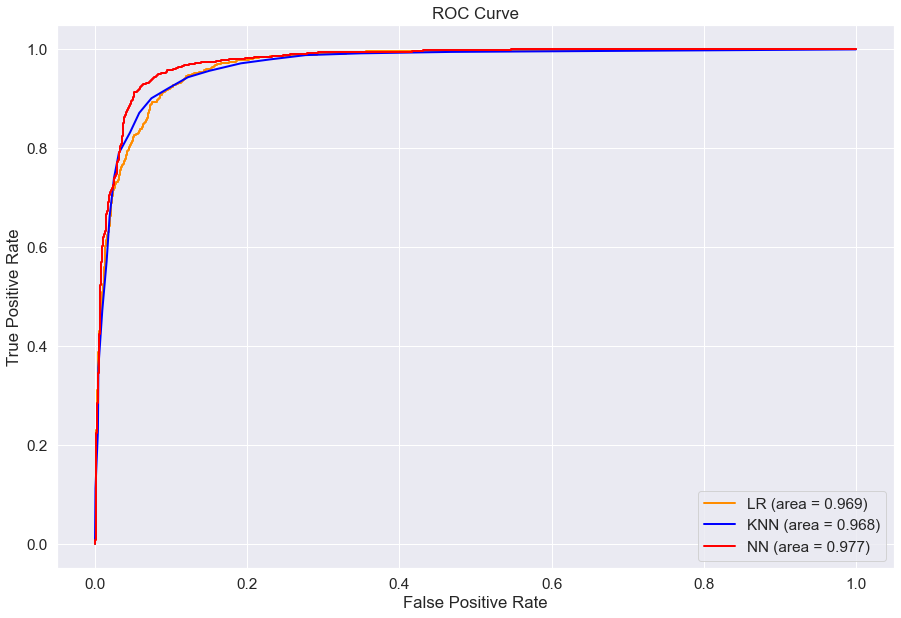

In [80]:
plt.figure(figsize=(15,10))
y_predict_probabilities = LR.predict_proba(x1_test)[:,1]
fpr, tpr, _= roc_curve(y1_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='LR (area = %0.3f)' % roc_auc)

y_predict_probabilities = KNN.predict_proba(x1_test)[:,1]
fpr, tpr, _ = roc_curve(y1_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue',
         lw=2, label='KNN (area = %0.3f)' % roc_auc)

y_predict_probabilities = MLP.predict_proba(x1_test)[:,1]
fpr, tpr, _ = roc_curve(y1_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         lw=2, label='NN (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Dataframe consisting of the different algorithms,accuracy and f1 score:

In [172]:
score=pd.DataFrame()
score['ALGORITHM']=algo
score['ACCURACY']=acc_list
score['F1-SCORE']=f1_list
score

,ALGORITHM,ACCURACY,F1-SCORE
0,LogisticRegressionCV,0.88072,0.88065
1,K-nearest Neighbours,0.88292,0.88260
2,Decision Tree,0.86391,0.86319
3,Bagging,0.88430,0.88363
4,BOOSTING,0.89036,0.89000
5,Neural_Networks,0.89256,0.89193
6,RANDOM-FOREST,0.89504,0.89443


### Model-selection:

**From the above ROC curve and the dataframe of algorithms the Random Forest are the best performing amoung the different algorithms shown above.**

### Model Deployment:  

#### Using Tkinter

**Since there are 33 different columns 8 of the columns are selected and the rest of the values are being selected based on the mean value.**

In [324]:
pickle.dump(model,open('model.pkl','wb'))

In [37]:
import pickle    
Model = pickle.load(open('model.pkl','rb'))

import tkinter as tk
from tkinter import ttk
win = tk.Tk()
win.title('FOOTBALL POSITION PREDICTION') 

#Column 1 
Age=ttk.Label(win,text="Age")
Age.grid(row=0,column=0,sticky=tk.W)
Age_var=tk.IntVar()
Age_entrybox=ttk.Entry(win,width=16,textvariable=Age_var)
Age_entrybox.grid(row=0,column=1)
#Column 2
PreferredFoot=ttk.Label(win,text="Preferred Foot 0:'Left', 1:'Right']")
PreferredFoot.grid(row=1,column=0,sticky=tk.W)
PreferredFoot_var=tk.IntVar()
PreferredFoot_entrybox=ttk.Entry(win,width=16,textvariable=PreferredFoot_var)
PreferredFoot_entrybox.grid(row=1,column=1)
#Column 3
Height=ttk.Label(win,text="Height")
Height.grid(row=2,column=0,sticky=tk.W)
Height_var=tk.IntVar()
Height_entrybox=ttk.Entry(win,width=16,textvariable=Height_var)
Height_entrybox.grid(row=2,column=1)
#Column 4
Weight=ttk.Label(win,text="Weight")
Weight.grid(row=3,column=0,sticky=tk.W)
Weight_var=tk.IntVar()
Weight_entrybox=ttk.Entry(win,width=16,textvariable=Weight_var)
Weight_entrybox.grid(row=3,column=1)
#Column 5
Crossing=ttk.Label(win,text="Crossing")
Crossing.grid(row=4,column=0,sticky=tk.W)
Crossing_var=tk.IntVar()
Crossing_entrybox=ttk.Entry(win,width=16,textvariable=Crossing_var)
Crossing_entrybox.grid(row=4,column=1)
#Column 6
Finishing=ttk.Label(win,text="Finishing")
Finishing.grid(row=5,column=0,sticky=tk.W)
Finishing_var=tk.IntVar()
Finishing_entrybox=ttk.Entry(win,width=16,textvariable=Finishing_var)
Finishing_entrybox.grid(row=5,column=1)
#Column 7
HeadingAccuracy=ttk.Label(win,text="HeadingAccuracy")
HeadingAccuracy.grid(row=6,column=0,sticky=tk.W)
HeadingAccuracy_var=tk.IntVar()
HeadingAccuracy_entrybox=ttk.Entry(win,width=16,textvariable=HeadingAccuracy_var)
HeadingAccuracy_entrybox.grid(row=6,column=1)
#Column 8
ShortPassing=ttk.Label(win,text="ShortPassing")
ShortPassing.grid(row=7,column=0,sticky=tk.W)
ShortPassing_var=tk.IntVar()
ShortPassing_entrybox=ttk.Entry(win,width=16,textvariable=ShortPassing_var)
ShortPassing_entrybox.grid(row=7,column=1)


import pandas as pd
def action():
    import pandas as pd
    Age=Age_var.get()
    preg=PreferredFoot_var.get()
    PRES=Height_var.get()
    SKIN=Weight_var.get()
    TEST=Crossing_var.get()
    MASS=Finishing_var.get()
    PEDI=HeadingAccuracy_var.get()
    AGE=ShortPassing_var.get()
    l=['Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']
    x=[Age,preg,PRES, SKIN,TEST,MASS,PEDI,AGE]
    for j in l:
        i=df[j].mean()
        x.append(i)
    return x
a=action()



output=Model.predict([np.array(a)])
if output==[0]:
    result="defender"
elif output==[1]:
    result="midfielder"
elif output==[2]:
    result="stricker"

Predict_button=ttk.Button(win,text="Predict",command=output)
Predict_button.grid(row=20,column=0)
Predict_entrybox=ttk.Entry(win,width=16)
Predict_entrybox.grid(row=20,column=1)
Predict_entrybox.insert(0,str(result))
win.mainloop()

#### Tkinter output: 

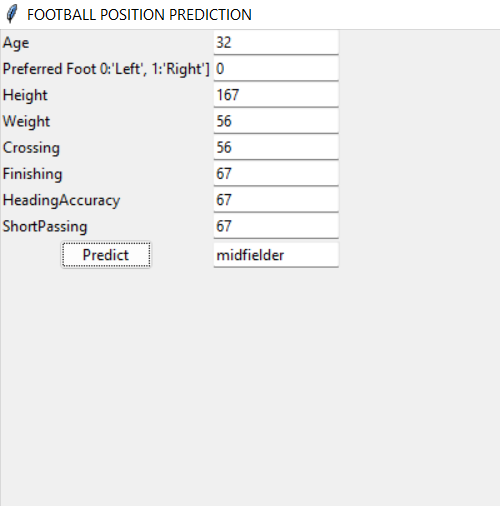


### using console:

In [40]:
import pandas as pd
df2=pd.DataFrame()
l=['Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']
m=['Age', 'Preferred Foot', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing']
for i in m:
    df2.loc[0,i]=input(f"\033[1m Enter the values:{i}\033[0m: ")
for j in l:
    df2.loc[0,j]=df[j].mean()
output=model.predict(df2)
if output==[0]:
    print("\033[1m The position is :defender \033[0m")
elif output==[1]:
    print("\033[1m The position is :midfielder \033[0m")
elif output==[2]:
    print("\033[1m The position is: stricker\033[0m")

 Enter the values:Age: 32
 Enter the values:Preferred Foot: 0
 Enter the values:Height: 167
 Enter the values:Weight: 56
 Enter the values:Crossing: 56
 Enter the values:Finishing: 67
 Enter the values:HeadingAccuracy: 67
 Enter the values:ShortPassing: 56
 The position is :midfielder 


### USING FLASK (WEB APPLIICATION)

#### INPUT:

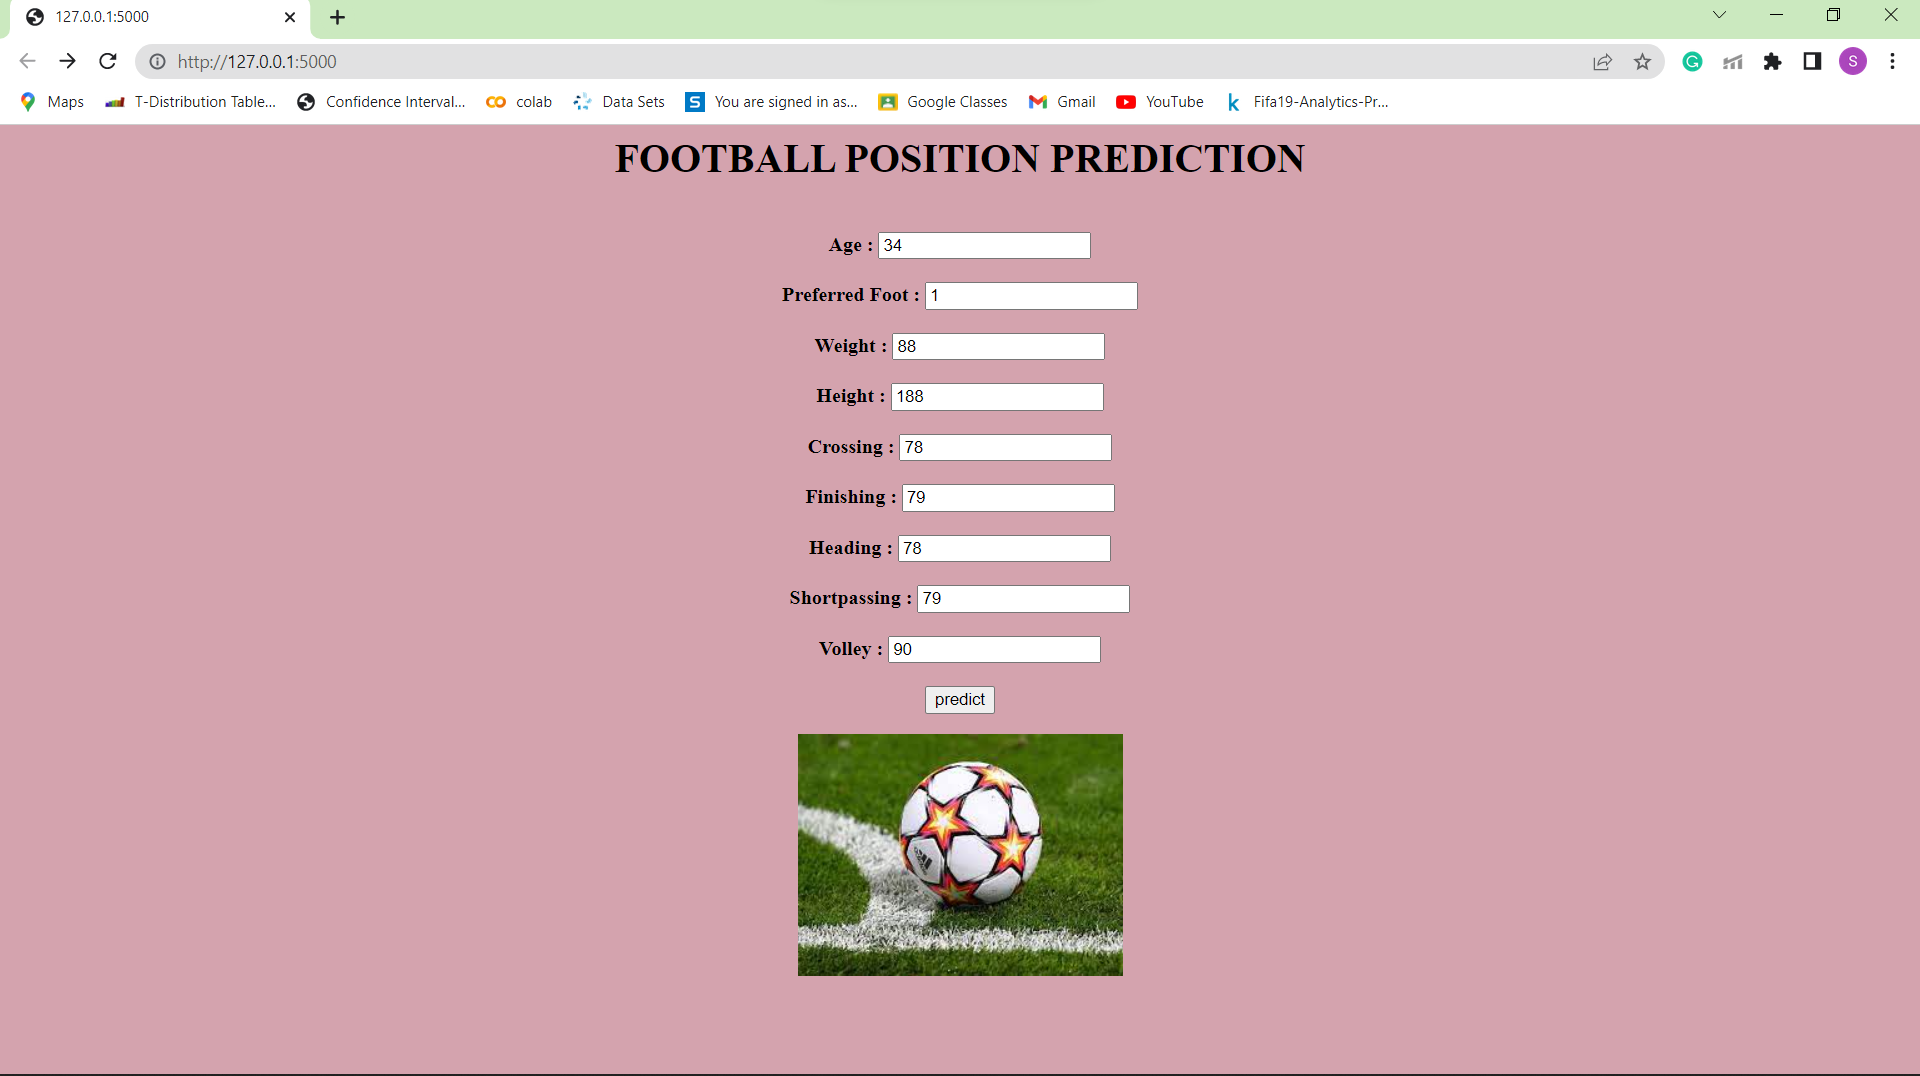

#### Prediction:

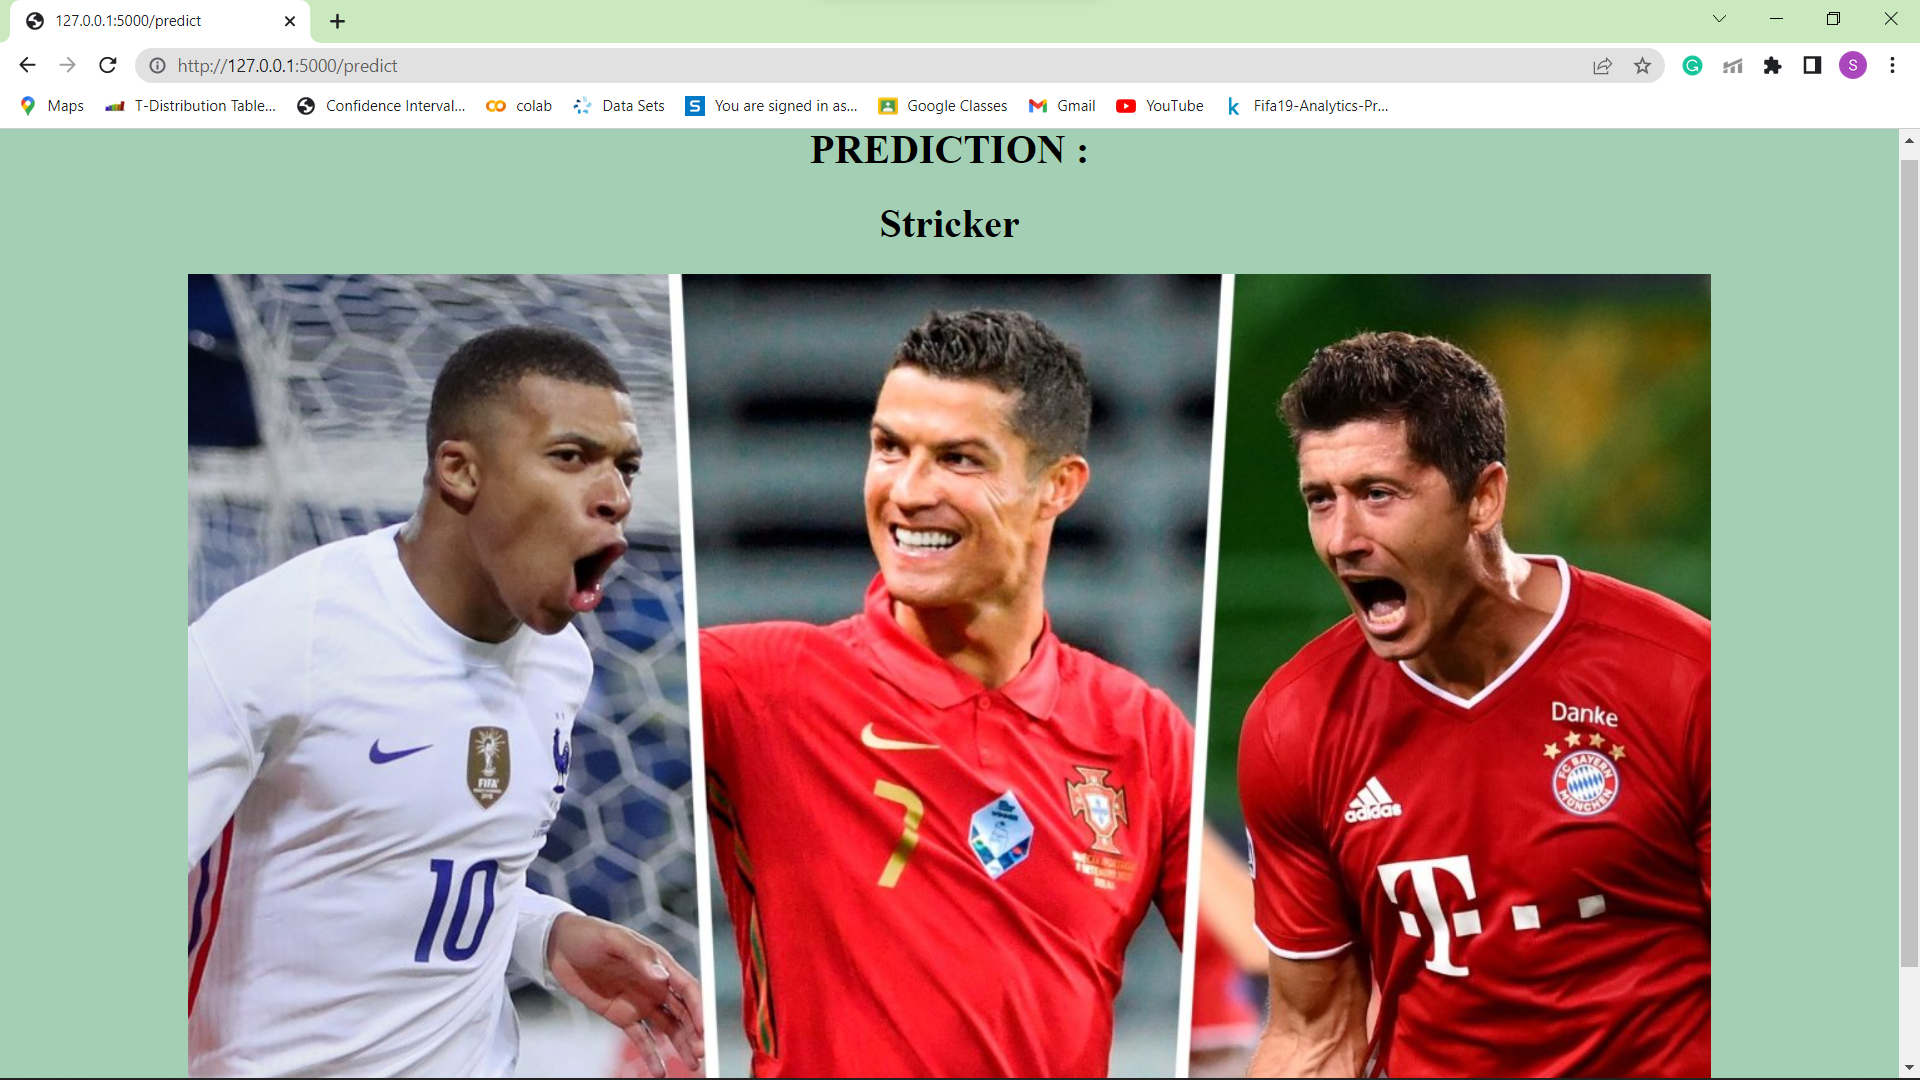

### CONCLUSION:

**MODEL HAS BEEN SUCESSFULLY DEPLOYED AND THE INTERMEDIATE STEPS WERE UNDERSTOOD.**

### REFERENCES:

- https://www.kaggle.com/code/lykin22/fifa19-player-team-analysis-and-value-predict/notebook
- https://towardsdatascience.com/deploy-a-machine-learning-model-using-flask-da580f84e60c
- https://towardsdatascience.com/exploratory-data-analysis-of-the-fifa-19-dataset-in-python-24eb27de9e59

